In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset

In [2]:
data1=pd.read_excel('test2.xlsx',sheet_name='sample 1')
data1

,Sample,Angle,Length,Theta C,Uncertainty,Theta left,Theta rigtht,Theta E,Radius,Circle StDev,Ellipse StDev,e,Point,Volume
0,plasma-ethyleneglycol-1.bmp,-179.466204,322.013975,169.4,0.0,167.8,165.3,166.6,871.53,0.197621,0.017898,0.18,103,2.772283e+09
1,plasma-toluene-1.bmp,-179.348940,440.028408,170.1,0.0,168.3,165.9,167.1,1069.43,0.216003,0.004115,0.32,103,5.121555e+09
2,plasma-water-1.bmp,-179.432734,303.014851,165.6,0.0,162.7,160.4,161.6,608.68,0.123677,0.016154,0.24,103,9.439412e+08
3,silane1-ethyleneglycol-1.bmp,-179.265479,156.012820,131.9,0.1,129.1,132.9,131.0,104.81,0.164018,1.676400,0.91,105,4.468519e+06
4,silane1-toluene-1.bmp,-179.377244,184.010869,124.0,0.2,112.9,117.9,115.4,110.95,0.381184,0.003274,0.71,103,5.008830e+06
5,silane1-water-1.bmp,-179.325963,170.011764,123.8,0.4,124.6,125.6,125.1,102.33,0.555719,0.003408,0.95,103,3.925813e+06
6,silane2-ethyleneglycol-1.bmp,-179.569213,133.003759,85.3,0.7,81.1,79.0,80.1,66.73,0.571908,0.001124,0.90,103,5.455465e+05
7,silane2-toluene-1.bmp,-179.359850,179.011173,117.2,0.2,106.6,111.2,108.9,100.64,0.251780,0.001907,0.77,103,3.496672e+06
8,silane2-water-1.bmp,-179.464541,107.004673,78.9,0.7,75.0,76.0,75.5,54.56,0.433446,1.295117,0.95,105,2.431202e+05


In [3]:
data2=pd.read_excel('test2.xlsx',sheet_name='sample 2')
data2

,Sample,Angle,Length,Theta C,Uncertainty,Theta left,Theta rigtht,Theta E,Radius,Circle StDev,Ellipse StDev,e,Point,Volume
0,plasma-ethyleneglycol-2.bmp,-179.283840,320.024999,167.7,0.0,159.5,158.4,159.0,754.24,0.211848,1.026707,0.15,105,1.796562e+09
1,plasma-toluene-2.bmp,-179.371782,456.027411,172.0,0.0,168.2,168.1,168.1,1358.85,0.160654,2.436190,0.18,109,1.050843e+10
2,plasma-water-2.bmp,-179.304134,247.018218,164.9,0.0,166.8,162.5,164.6,473.91,0.128453,1.275860,0.52,103,4.454448e+08
3,silane1-ethyleneglycol-2.bmp,-179.317940,168.011904,121.3,0.4,114.8,118.2,116.5,98.28,0.538880,1.194604,0.81,107,3.396911e+06
4,silane1-toluene-2.bmp,-179.258348,309.025889,169.7,0.0,167.1,166.3,162.0,864.00,0.165078,1.324404,0.17,109,2.701153e+09
5,silane1-water-2.bmp,-179.590751,140.003571,101.7,0.1,100.9,103.4,102.2,71.48,0.132409,0.001240,0.98,103,9.944139e+05
6,silane2-ethyleneglycol-2.bmp,-179.151236,135.014814,86.6,0.6,79.0,81.2,80.1,67.67,0.518311,1.303467,0.90,105,5.914418e+05
7,silane2-toluene-2.bmp,-179.325963,170.011764,117.9,0.3,112.8,115.9,114.4,96.18,0.482690,0.001802,0.86,103,3.075550e+06
8,silane2-water-2.bmp,-179.454342,105.004762,70.6,0.6,68.1,68.4,68.2,55.69,0.332003,1.010965,0.97,105,1.881288e+05


In [4]:
#The surface tension of each droplet.
ethyleneglycol=47.70
toluene=28.40
water=72.8

In [5]:
#The function to calculate the contact angle.
cos=np.cos
sin=np.sin
pi=np.pi
def contact_angle(x):
    x = np.array(x)  # Ensure x is a NumPy array for element-wise operations
    angle = np.pi * (180-x) / 180  # Calculate the angle in radians
    cos_angle = np.cos(angle)  # Calculate the cosine of the angle
    return cos_angle

In [6]:
#The data of sample 1
plasma_1=np.array(data1['Theta C'].iloc[:3])
silane1_1=np.array(data1['Theta E'].iloc[3:6])
silane2_1=np.array(data1['Theta E'].iloc[6:])
#The data of sample 2
plasma_2=np.array(data2['Theta C'].iloc[:3])
silane1_2=np.array(data2['Theta E'].iloc[3:6])
silane2_2=np.array(data2['Theta E'].iloc[6:])
#The average value of sample 1 and sample 2
plasma_av=(plasma_1+plasma_2)/2
silane1_av=(silane1_1+silane1_2)/2
silane2_av=(silane2_1+silane2_2)/2
surface_tension=np.array([ethyleneglycol,toluene,water])

In [7]:
print(plasma_1)
print(plasma_2)
print(plasma_av)

[169.4 170.1 165.6]
[167.7 172.  164.9]
[168.55 171.05 165.25]


In [8]:
#Fit the curve with linear model of sample 1.
coefficients_plasma_1 = np.polyfit(surface_tension,1-contact_angle(plasma_1) , 1)
coefficients_silane1_1 = np.polyfit(surface_tension,1-contact_angle(silane1_1) , 1)
coefficients_silane2_1 = np.polyfit(surface_tension,1-contact_angle(silane2_1) , 1)
fit_line_plasma_1 = np.poly1d(coefficients_plasma_1)
fit_line_silane1_1 = np.poly1d(coefficients_silane1_1)
fit_line_silane2_1 = np.poly1d(coefficients_silane2_1)

In [9]:
#Fit the curve with linear model of sample 2.
coefficients_plasma_2 = np.polyfit(surface_tension,1-contact_angle(plasma_2) , 1)
coefficients_silane1_2 = np.polyfit(surface_tension,1-contact_angle(silane1_2) , 1)
coefficients_silane2_2 = np.polyfit(surface_tension,1-contact_angle(silane2_2) , 1)
fit_line_plasma_2 = np.poly1d(coefficients_plasma_2)
fit_line_silane1_2 = np.poly1d(coefficients_silane1_2)
fit_line_silane2_2 = np.poly1d(coefficients_silane2_2)

In [10]:
#Fit the curve with linear model of the average value.
coefficients_plasma_av = np.polyfit(surface_tension,1-contact_angle(plasma_av) , 1)
coefficients_silane1_av = np.polyfit(surface_tension,1-contact_angle(silane1_av) , 1)
coefficients_silane2_av = np.polyfit(surface_tension,1-contact_angle(silane2_av) , 1)
fit_line_plasma_av = np.poly1d(coefficients_plasma_av)
fit_line_silane1_av = np.poly1d(coefficients_silane1_av)
fit_line_silane2_av = np.poly1d(coefficients_silane2_av)

In [11]:
#Calculate the critical surface tension
def find_x_for_y_equals_0(coefficients):
    # The line equation is y = mx + b
    # To find x for y = 0, we rearrange to x = (0- b) / m
    m = coefficients[0]
    b = coefficients[1]
    x_value = (0- b) / m
    return x_value

# Find the x-value where y equals 1 for each line in sample 1
x_value_plasma_1 = find_x_for_y_equals_0(coefficients_plasma_1)
x_value_silane1_1 = find_x_for_y_equals_0(coefficients_silane1_1)
x_value_silane2_1 = find_x_for_y_equals_0(coefficients_silane2_1)
# Find the x-value where y equals 1 for each line in sample 2
x_value_plasma_2 = find_x_for_y_equals_0(coefficients_plasma_2)
x_value_silane1_2 = find_x_for_y_equals_0(coefficients_silane1_2)
x_value_silane2_2 = find_x_for_y_equals_0(coefficients_silane2_2)
# Find the x-value where y equals 1 for each line of average value.
x_value_plasma_av = find_x_for_y_equals_0(coefficients_plasma_av)
x_value_silane1_av = find_x_for_y_equals_0(coefficients_silane1_av)
x_value_silane2_av = find_x_for_y_equals_0(coefficients_silane2_av)

### Sample1

{'plasma': 0.11844348249139909, 'silane1': 0.16161311970453515, 'silane2': 0.11185831801680103}


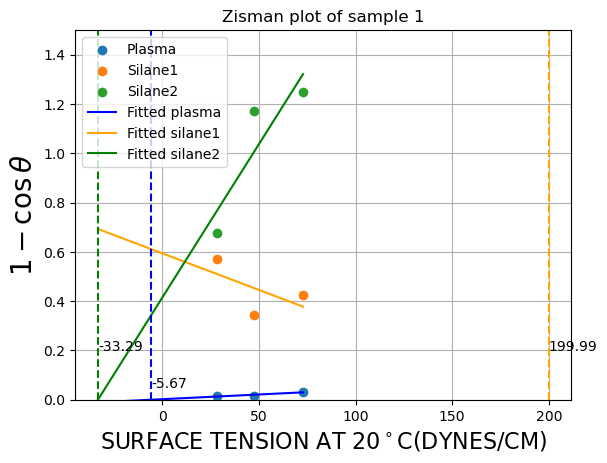

In [12]:
from sklearn.metrics import mean_absolute_percentage_error
#Draw the zisman plot
x_fit_1 = np.linspace(min([x_value_plasma_1,x_value_silane1_1,x_value_silane2_1]),max(surface_tension), 100)
y_fit1_1 = fit_line_plasma_1(x_fit_1)
y_fit2_1 = fit_line_silane1_1(x_fit_1)
y_fit3_1 = fit_line_silane2_1(x_fit_1)
plt.scatter(surface_tension, 1-contact_angle(plasma_1),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_1), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_1), label='Silane2')
plt.plot(x_fit_1, y_fit1_1, color='blue', label='Fitted plasma')
plt.plot(x_fit_1, y_fit2_1, color='orange', label='Fitted silane1')
plt.plot(x_fit_1, y_fit3_1, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of sample 1')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_1, color='green', linestyle='--')
plt.axvline(x_value_silane1_1, color='orange', linestyle='--')
plt.axvline(x_value_plasma_1, color='blue', linestyle='--')
plt.text(x_value_plasma_1,0.05,np.round(x_value_plasma_1, decimals=2))
plt.text(x_value_silane2_1,0.2,np.round(x_value_silane2_1, decimals=2))
plt.text(x_value_silane1_1,0.2,np.round(x_value_silane1_1, decimals=2))
error_plasma=mean_absolute_percentage_error(fit_line_plasma_1(surface_tension),1-contact_angle(plasma_1))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_1(surface_tension),1-contact_angle(silane1_1))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_1(surface_tension),1-contact_angle(silane2_1))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

### Sample 2

{'plasma': 0.060655300281241414, 'silane1': 0.30927104335983435, 'silane2': 0.11457782764810738}


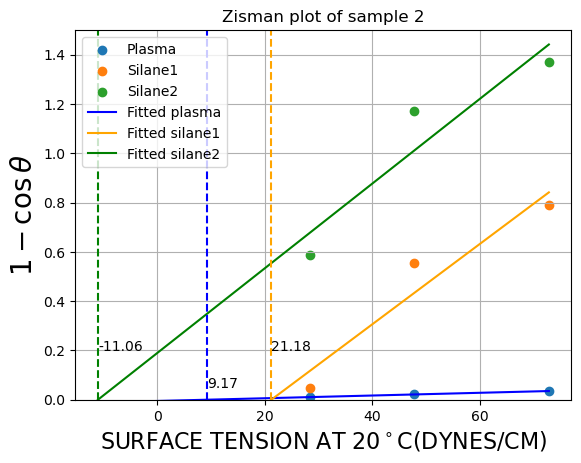

In [13]:
#Draw the zisman plot
x_fit_2 = np.linspace(min([x_value_plasma_2,x_value_silane1_2,x_value_silane2_2]),max(surface_tension), 100)
y_fit1_2 = fit_line_plasma_2(x_fit_2)
y_fit2_2 = fit_line_silane1_2(x_fit_2)
y_fit3_2 = fit_line_silane2_2(x_fit_2)
plt.scatter(surface_tension, 1-contact_angle(plasma_2),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_2), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_2), label='Silane2')
plt.plot(x_fit_2, y_fit1_2, color='blue', label='Fitted plasma')
plt.plot(x_fit_2, y_fit2_2, color='orange', label='Fitted silane1')
plt.plot(x_fit_2, y_fit3_2, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of sample 2')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_2, color='green', linestyle='--')
plt.axvline(x_value_silane1_2, color='orange', linestyle='--')
plt.axvline(x_value_plasma_2, color='blue', linestyle='--')
plt.text(x_value_plasma_2,0.05,np.round(x_value_plasma_2, decimals=2))
plt.text(x_value_silane2_2,0.2,np.round(x_value_silane2_2, decimals=2))
plt.text(x_value_silane1_2,0.2,np.round(x_value_silane1_2, decimals=2))
error_plasma=mean_absolute_percentage_error(fit_line_plasma_2(surface_tension),1-contact_angle(plasma_2))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_2(surface_tension),1-contact_angle(silane1_2))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_2(surface_tension),1-contact_angle(silane2_2))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

### The average value of sample 1 and sample 2

{'plasma': 0.03170516670071994, 'silane1': 0.050469022843743404, 'silane2': 0.11303027832774715}


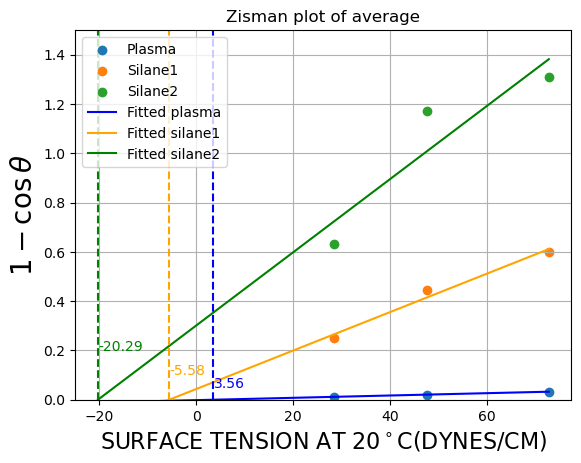

In [14]:
#Draw the zisman plot
x_fit_av = np.linspace(min([x_value_plasma_av,x_value_silane1_av,x_value_silane2_av]),max(surface_tension), 100)
y_fit1_av = fit_line_plasma_av(x_fit_av)
y_fit2_av = fit_line_silane1_av(x_fit_av)
y_fit3_av = fit_line_silane2_av(x_fit_av)
plt.scatter(surface_tension, 1-contact_angle(plasma_av),label='Plasma')
plt.scatter(surface_tension, 1-contact_angle(silane1_av), label='Silane1')
plt.scatter(surface_tension, 1-contact_angle(silane2_av), label='Silane2')
plt.plot(x_fit_av, y_fit1_av, color='blue', label='Fitted plasma')
plt.plot(x_fit_av, y_fit2_av, color='orange', label='Fitted silane1')
plt.plot(x_fit_av, y_fit3_av, color='green', label='Fitted silane2')
plt.xlabel(r'SURFACE TENSION AT $20^\circ$C(DYNES/CM)',fontsize=16)
plt.ylabel(r"$1-\cos\theta$",fontsize=20)
plt.title('Zisman plot of average')
plt.legend(loc='upper left')
plt.ylim(0,1.5)
plt.grid()
plt.axvline(x_value_silane2_av, color='green', linestyle='--')
plt.axvline(x_value_silane1_av, color='orange', linestyle='--')
plt.axvline(x_value_plasma_av, color='blue', linestyle='--')
plt.text(x_value_plasma_av,0.05,np.round(x_value_plasma_av, decimals=2),color='blue')
plt.text(x_value_silane2_av,0.2,np.round(x_value_silane2_av, decimals=2),color='green')
plt.text(x_value_silane1_av,0.1,np.round(x_value_silane1_av, decimals=2),color='orange')
error_plasma=mean_absolute_percentage_error(fit_line_plasma_av(surface_tension),1-contact_angle(plasma_av))
error_silane1=mean_absolute_percentage_error(fit_line_silane1_av(surface_tension),1-contact_angle(silane1_av))
error_silane2=mean_absolute_percentage_error(fit_line_silane2_av(surface_tension),1-contact_angle(silane2_av))
error={'plasma':error_plasma,'silane1':error_silane1,'silane2':error_silane2}
print(error)
plt.show()

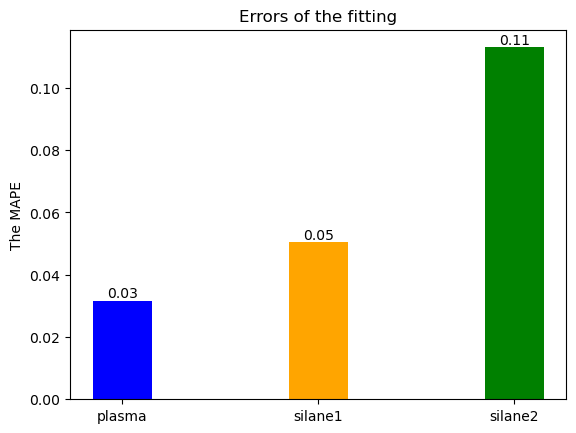

In [15]:
# Creating the bar plot
fig, ax = plt.subplots()
bar_color = ['blue', 'orange', 'green']
bars = ax.bar(['plasma', 'silane1', 'silane2'], [error_plasma, error_silane1, error_silane2], width=0.3, color=bar_color)

# Setting the title and labels
ax.set_title("Errors of the fitting")
ax.set_ylabel('The MAPE')

# Adding the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

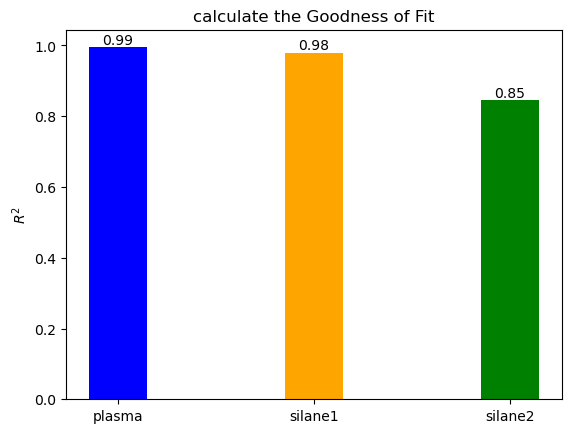

In [16]:
from sklearn.metrics import r2_score
score1=r2_score(1-contact_angle(plasma_av),fit_line_plasma_av(surface_tension))
score2=r2_score(1-contact_angle(silane1_av),fit_line_silane1_av(surface_tension))
score3=r2_score(1-contact_angle(silane2_av),fit_line_silane2_av(surface_tension))
score3
# Creating the bar plot
fig, ax = plt.subplots()
bar_color = ['blue', 'orange', 'green']
bars = ax.bar(['plasma', 'silane1', 'silane2'], [score1,score2,score3],width=0.3,color=bar_color)

# Setting the title and labels
ax.set_title("calculate the Goodness of Fit")
ax.set_ylabel(r'$R^2$')

# Adding the value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

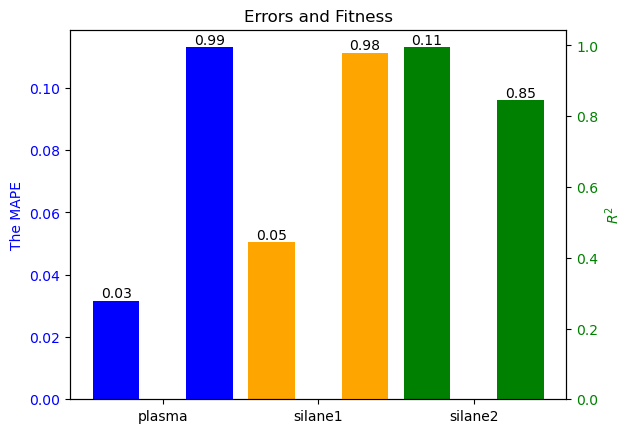

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# Creating the figure and primary axis
fig, ax1 = plt.subplots()

# Calculating positions for the two sets of bars
bar_width = 0.3
positions = [0, 1, 2]  # Base positions for each group
error_positions = [p - bar_width for p in positions]  # Shift for error bars
score_positions = [p + bar_width for p in positions]  # Shift for score bars

# Plotting the Errors of the fitting on primary axis
bar_color = ['blue', 'orange', 'green']
bars1 = ax1.bar(error_positions, [error_plasma, error_silane1, error_silane2], width=bar_width, color=bar_color)

ax1.set_title("Errors and Fitness")
ax1.set_ylabel('The MAPE', color='blue')
ax1.set_xticks(positions)
ax1.set_xticklabels(['plasma', 'silane1', 'silane2'])
ax1.tick_params(axis='y', labelcolor='blue')

# Adding value labels on top of each bar for errors
for bar, pos in zip(bars1, error_positions):
    yval = bar.get_height()
    ax1.text(pos, yval, round(yval, 2), ha='center', va='bottom')

# Creating secondary axis for Goodness of Fit
ax2 = ax1.twinx()

# Plotting the Goodness of Fit on secondary axis
bars2 = ax2.bar(score_positions, [score1, score2, score3], width=bar_width, color=bar_color)

ax2.set_ylabel(r'$R^2$', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Adding value labels on top of each bar for scores
for bar, pos in zip(bars2, score_positions):
    yval = bar.get_height()
    ax2.text(pos, yval, round(yval, 2), ha='center', va='bottom')

plt.show()
